In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [2]:
# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [3]:
print("Original shape:", X.shape)
print("\nFirst few feature names:")
print(X.columns[:5].tolist())

Original shape: (569, 30)

First few feature names:
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']


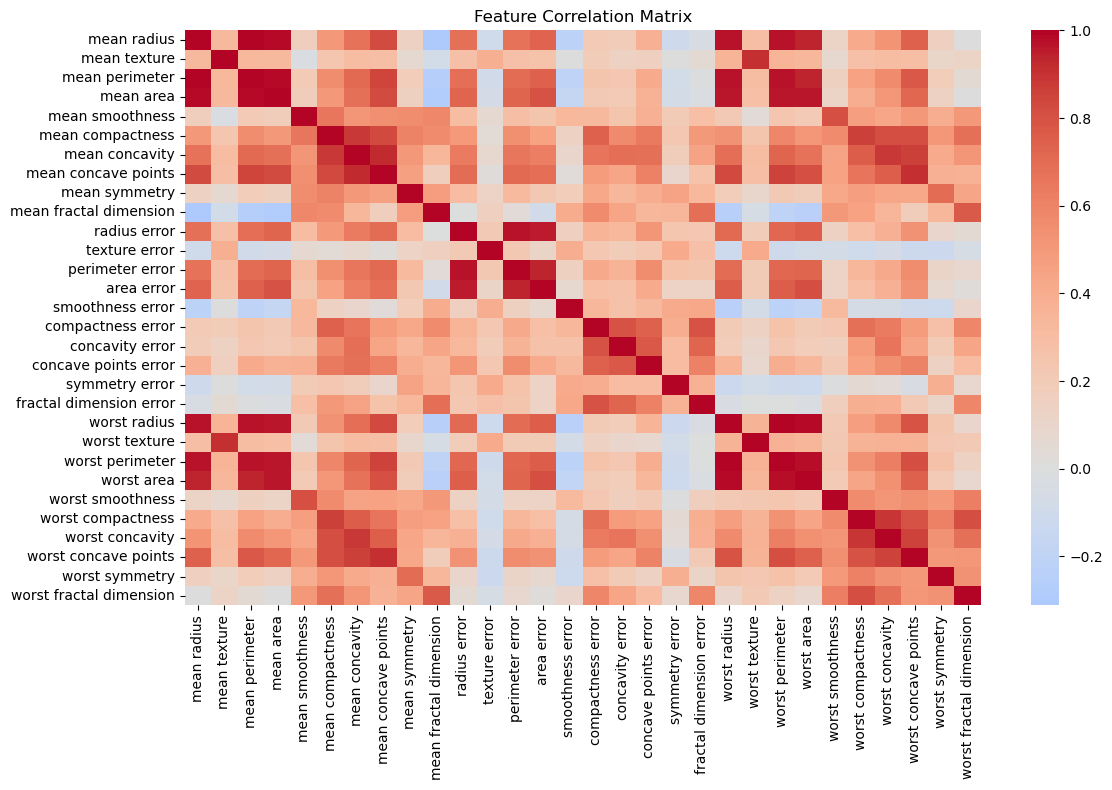

In [4]:
# 1. Correlation Matrix
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [5]:
# Print highly correlated features (correlation > 0.9)
print("\nHighly correlated feature pairs (>0.9):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            print(f"{correlation_matrix.columns[i]} <-> {correlation_matrix.columns[j]}")
            print(f"Correlation: {correlation_matrix.iloc[i, j]:.3f}")


Highly correlated feature pairs (>0.9):
mean perimeter <-> mean radius
Correlation: 0.998
mean area <-> mean radius
Correlation: 0.987
mean area <-> mean perimeter
Correlation: 0.987
mean concave points <-> mean concavity
Correlation: 0.921
perimeter error <-> radius error
Correlation: 0.973
area error <-> radius error
Correlation: 0.952
area error <-> perimeter error
Correlation: 0.938
worst radius <-> mean radius
Correlation: 0.970
worst radius <-> mean perimeter
Correlation: 0.969
worst radius <-> mean area
Correlation: 0.963
worst texture <-> mean texture
Correlation: 0.912
worst perimeter <-> mean radius
Correlation: 0.965
worst perimeter <-> mean perimeter
Correlation: 0.970
worst perimeter <-> mean area
Correlation: 0.959
worst perimeter <-> worst radius
Correlation: 0.994
worst area <-> mean radius
Correlation: 0.941
worst area <-> mean perimeter
Correlation: 0.942
worst area <-> mean area
Correlation: 0.959
worst area <-> worst radius
Correlation: 0.984
worst area <-> worst p

In [6]:
# 2. SelectKBest with different scoring functions
# 2.1 F-Score (ANOVA)
k_best_f = SelectKBest(score_func=f_classif, k=10)
X_kbest_f = k_best_f.fit_transform(X, y)
selected_features_f = X.columns[k_best_f.get_support()].tolist()

In [7]:
# 2.2 Mutual Information
k_best_mi = SelectKBest(score_func=mutual_info_classif, k=10)
X_kbest_mi = k_best_mi.fit_transform(X, y)
selected_features_mi = X.columns[k_best_mi.get_support()].tolist()

In [8]:
# 2.3 Chi-Square (requires non-negative features)
# Scale features to make them non-negative for chi-square
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
k_best_chi2 = SelectKBest(score_func=chi2, k=10)
X_kbest_chi2 = k_best_chi2.fit_transform(X_scaled, y)
selected_features_chi2 = X.columns[k_best_chi2.get_support()].tolist()

In [9]:
# 3. Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
rf_selector = SelectFromModel(rf, prefit=True)
selected_features_rf = X.columns[rf_selector.get_support()].tolist()

In [10]:
# Print results
print("\nTop 10 features selected by F-Score:")
for feature, score in zip(selected_features_f, k_best_f.scores_[k_best_f.get_support()]):
    print(f"{feature}: {score:.3f}")


Top 10 features selected by F-Score:
mean radius: 646.981
mean perimeter: 697.235
mean area: 573.061
mean concavity: 533.793
mean concave points: 861.676
worst radius: 860.782
worst perimeter: 897.944
worst area: 661.600
worst concavity: 436.692
worst concave points: 964.385


In [11]:
print("\nTop 10 features selected by Mutual Information:")
for feature, score in zip(selected_features_mi, k_best_mi.scores_[k_best_mi.get_support()]):
    print(f"{feature}: {score:.3f}")


Top 10 features selected by Mutual Information:
mean radius: 0.369
mean perimeter: 0.405
mean area: 0.357
mean concavity: 0.375
mean concave points: 0.442
area error: 0.338
worst radius: 0.453
worst perimeter: 0.476
worst area: 0.464
worst concave points: 0.438


In [12]:
print("\nTop 10 features selected by Chi-Square:")
for feature, score in zip(selected_features_chi2, k_best_chi2.scores_[k_best_chi2.get_support()]):
    print(f"{feature}: {score:.3f}")


Top 10 features selected by Chi-Square:
mean radius: 24.897
mean perimeter: 26.529
mean area: 29.329
mean concavity: 46.186
mean concave points: 52.406
worst radius: 34.125
worst perimeter: 34.438
worst area: 35.044
worst concavity: 31.563
worst concave points: 46.342


In [13]:
print("\nFeatures selected by Random Forest Importance:")
for feature, importance in zip(selected_features_rf, rf.feature_importances_[rf_selector.get_support()]):
    print(f"{feature}: {importance:.3f}")


Features selected by Random Forest Importance:
mean radius: 0.035
mean perimeter: 0.068
mean area: 0.060
mean concavity: 0.067
mean concave points: 0.107
worst radius: 0.083
worst perimeter: 0.081
worst area: 0.139
worst concavity: 0.037
worst concave points: 0.132


In [14]:
# Create comparison DataFrame
comparison = pd.DataFrame({
    'F-Score': selected_features_f,
    'Mutual Information': selected_features_mi,
    'Chi-Square': selected_features_chi2,
    'Random Forest': selected_features_rf
})

In [15]:
print("\nComparison of selected features by different methods:")
print(comparison)


Comparison of selected features by different methods:
                F-Score    Mutual Information            Chi-Square  \
0           mean radius           mean radius           mean radius   
1        mean perimeter        mean perimeter        mean perimeter   
2             mean area             mean area             mean area   
3        mean concavity        mean concavity        mean concavity   
4   mean concave points   mean concave points   mean concave points   
5          worst radius            area error          worst radius   
6       worst perimeter          worst radius       worst perimeter   
7            worst area       worst perimeter            worst area   
8       worst concavity            worst area       worst concavity   
9  worst concave points  worst concave points  worst concave points   

          Random Forest  
0           mean radius  
1        mean perimeter  
2             mean area  
3        mean concavity  
4   mean concave points  
5      

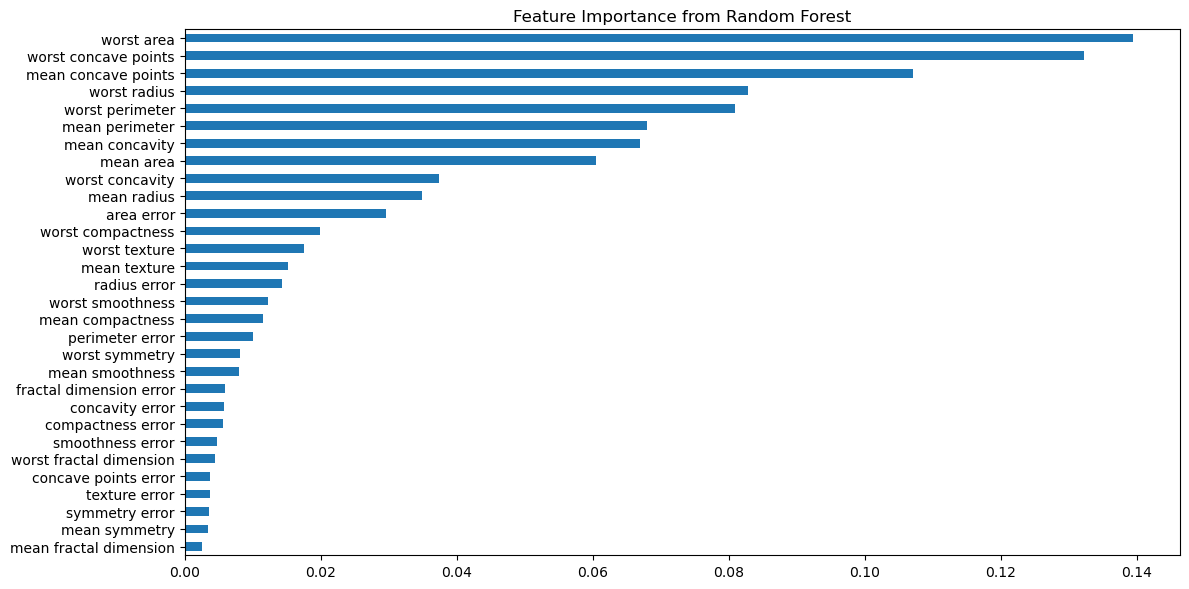

In [16]:
# Plot feature importance from Random Forest
plt.figure(figsize=(12, 6))
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()